# Import Libraries

In [432]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [433]:
import warnings
warnings.filterwarnings('ignore')

# DataSet

In [434]:
ckd=pd.read_csv("F:\ml\kidney_disease.csv")

In [435]:
ckd.shape

(400, 26)

In [436]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Renaming Column Names

In [437]:
ckd.drop('id',axis=1,inplace=True)

In [438]:
ckd.columns=['age','blood_pressure','specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria','blood_glucose_random','blood_urea',
              'serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension','diabetes_mellitus',
              'coronary_artery_disease','appetite','peda_edema','aanemia','classification']

In [439]:
ckd.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Feature instances

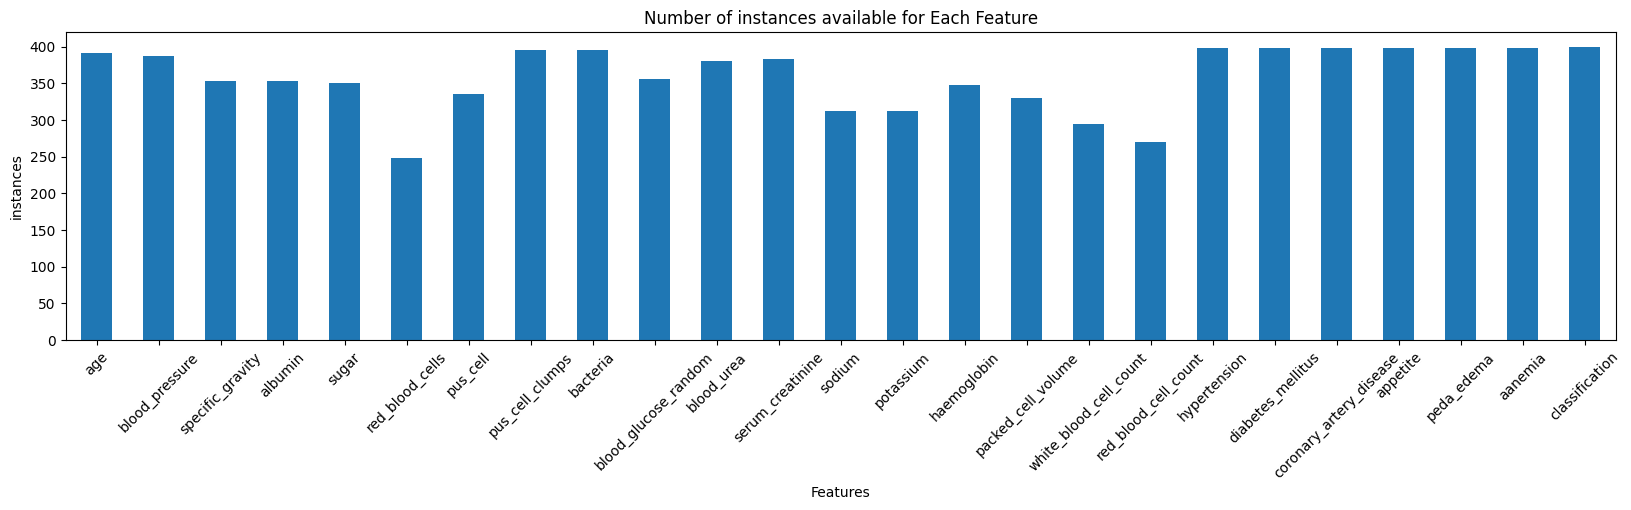

In [440]:
nn_counts=ckd.notnull().sum()
plt.figure(figsize=(20, 4))
nn_counts.plot(kind='bar')
plt.title('Number of instances available for Each Feature')
plt.xlabel('Features')
plt.ylabel('instances')
plt.xticks(rotation=45)
plt.show()

In [441]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [442]:
ckd['packed_cell_volume']=pd.to_numeric(ckd['packed_cell_volume'],errors='coerce')
ckd['white_blood_cell_count']=pd.to_numeric(ckd['white_blood_cell_count'],errors='coerce')
ckd['red_blood_cell_count']=pd.to_numeric(ckd['red_blood_cell_count'],errors='coerce')

# Numerical Features vs Categorical Features

In [443]:
categorical=[col for col in ckd.columns if ckd[col].dtype=='object']
numerical=[col for col in ckd.columns if ckd[col].dtype!='object']

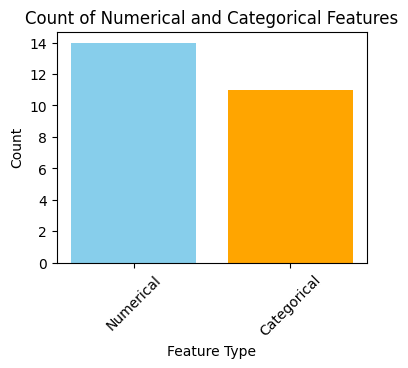

In [444]:
num_numerical_features=len(numerical)
num_categorical_features=len(categorical)
plt.figure(figsize=(4,3))
plt.bar(['Numerical','Categorical'],[num_numerical_features,num_categorical_features],color=['skyblue', 'orange'])
plt.title('Count of Numerical and Categorical Features')
plt.xlabel('Feature Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Categorical Values

In [445]:
for col in categorical:
    print(f"{col} has {ckd[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



# Data Cleaning

In [446]:
ckd.diabetes_mellitus=ckd.diabetes_mellitus.replace("\tno","no") 
ckd.diabetes_mellitus=ckd.diabetes_mellitus.replace("\tyes","yes") 
ckd.diabetes_mellitus=ckd.diabetes_mellitus.replace(" yes","yes") 
ckd.coronary_artery_disease=ckd.coronary_artery_disease.replace("\tno","no")
ckd.classification=ckd.classification.replace("ckd\t","ckd")

# Histogram for Categorical Features

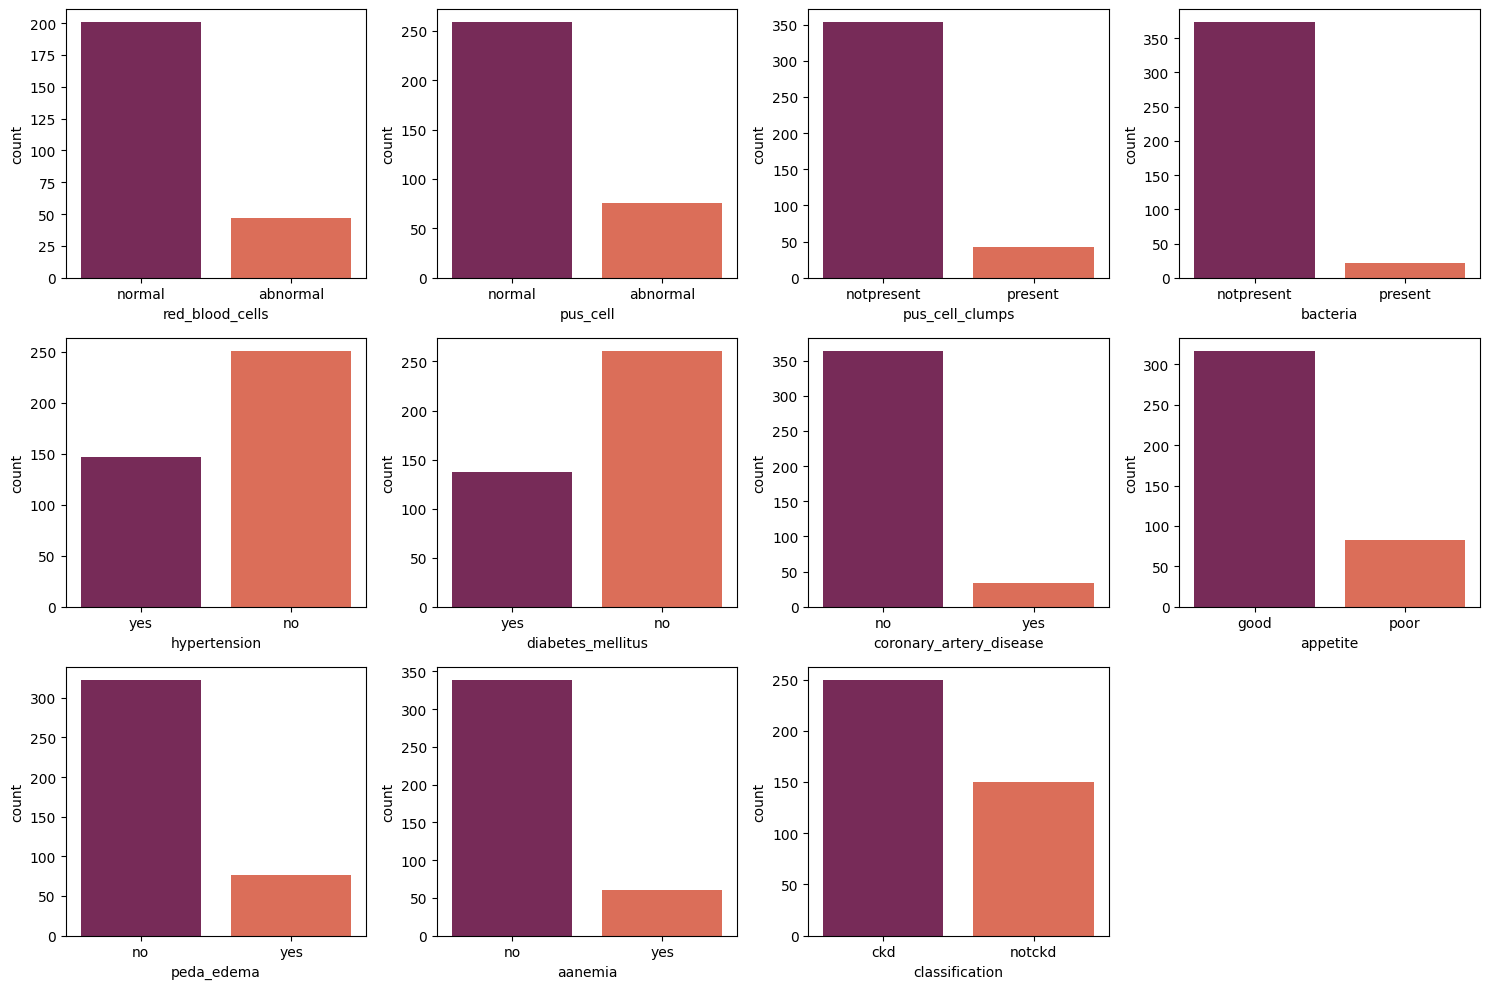

In [447]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in categorical:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.countplot(data=ckd,x=column,palette='rocket',ax=ax)
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Density plot for Numerical Features

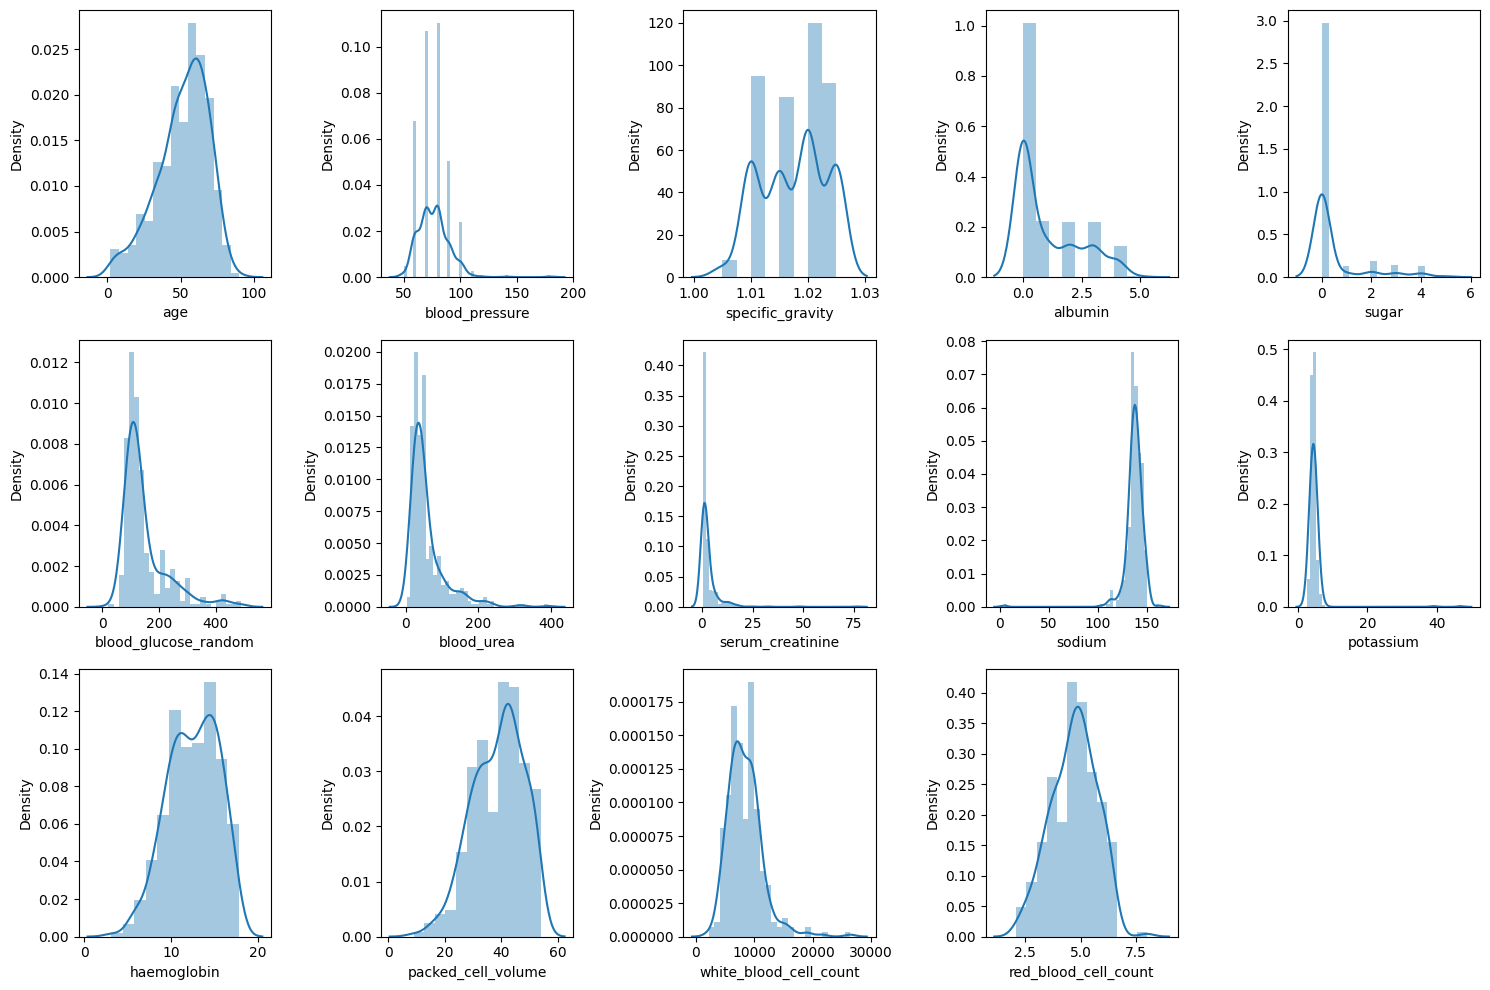

In [448]:
plt.figure(figsize=(15, 10))
plotnumber=1
for column in numerical:
    if plotnumber<=14:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(ckd[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Percentage of Missing Values by Feature

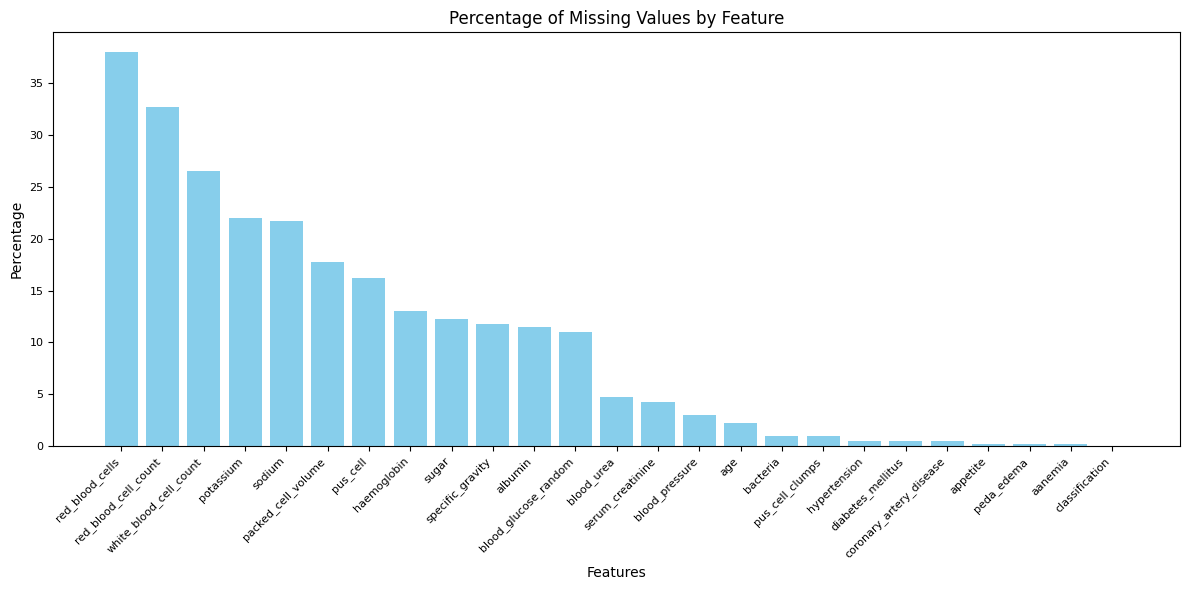

In [449]:
missing_values_percentage=(ckd.isnull().sum()/len(ckd))*100
missing_values_percentage=missing_values_percentage.sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(missing_values_percentage.index,missing_values_percentage, color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=45,ha='right',fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Filling Null Values

In [450]:
for column in numerical:
    ckd[column]=ckd[column].fillna(ckd[column].mean())
for column in categorical:
    ckd[column].fillna(ckd[column].mode()[0],inplace=True)


In [451]:
ckd.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
classification             0
dtype: int64

In [452]:
for column in categorical:
    print(f"{column} has {ckd[column].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

classification has 2 categories



# Label Encoding

In [453]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in categorical:
    ckd[column]=label_encoder.fit_transform(ckd[column])

In [454]:
ckd

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


# HeatMap

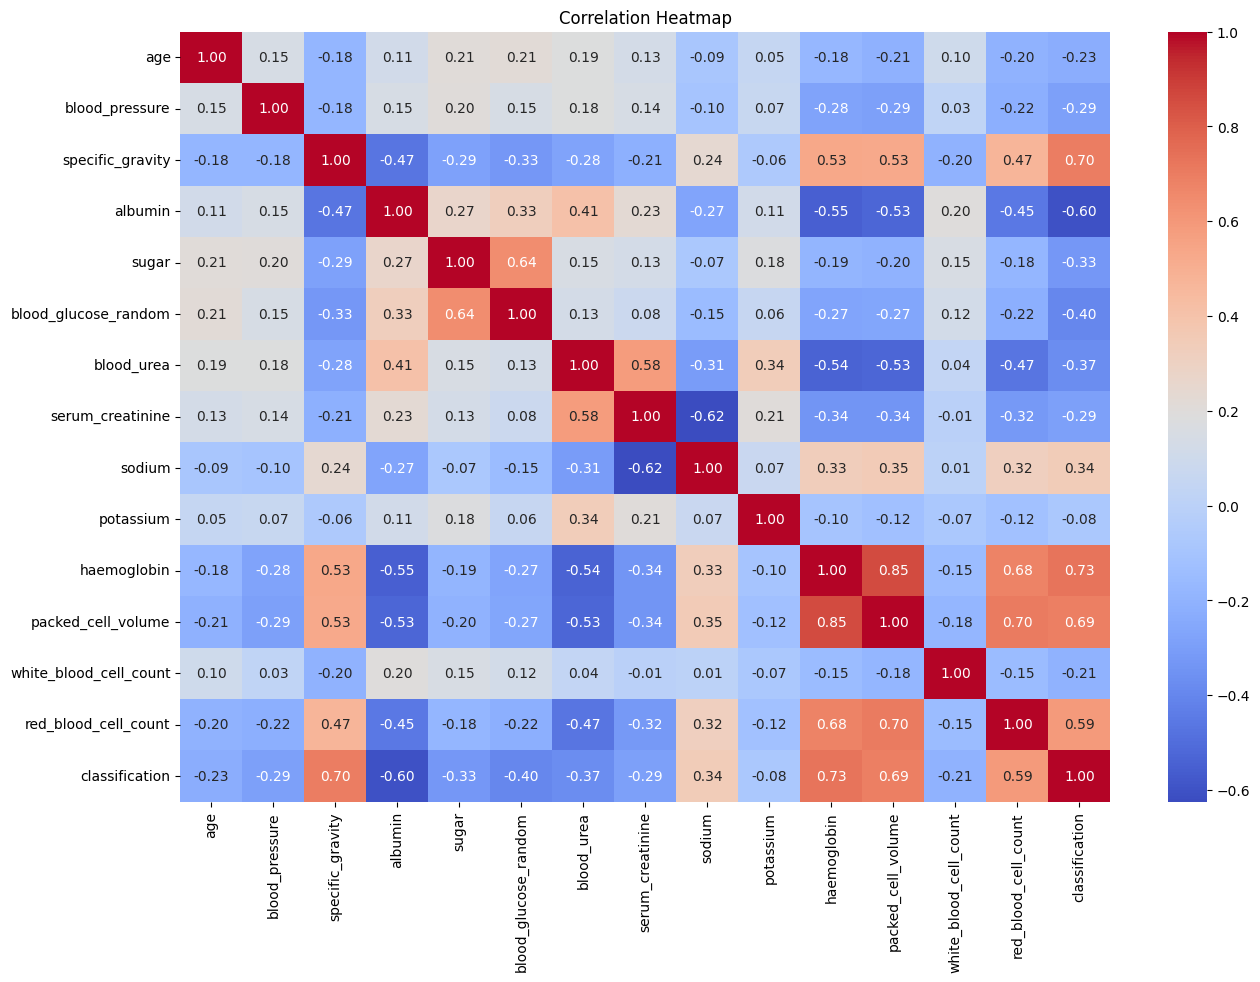

In [455]:
plt.figure(figsize=(15,10))
numerical.append("classification")
correlation_matrix=ckd[numerical].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [456]:
correlation_matrix

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,classification
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.214410,0.187544,0.127316,-0.085949,0.050148,-0.175380,-0.211805,0.100061,-0.201051,-0.225405
blood_pressure,0.148004,1.000000,-0.182463,0.146593,0.200784,0.149100,0.183970,0.144359,-0.103220,0.066648,-0.279535,-0.292714,0.026067,-0.220822,-0.290600
specific_gravity,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,0.531755,0.528437,-0.201311,0.466976,0.698957
albumin,0.114764,0.146593,-0.466698,1.000000,0.268070,0.326400,0.405778,0.230479,-0.271316,0.114427,-0.549697,-0.527242,0.200443,-0.454886,-0.599238
sugar,0.207857,0.200784,-0.287993,0.268070,1.000000,0.639186,0.152186,0.130122,-0.073715,0.181015,-0.191518,-0.202573,0.153274,-0.182278,-0.327812
blood_glucose_random,0.214410,0.149100,-0.326339,0.326400,0.639186,1.000000,0.127489,0.082242,-0.154393,0.056695,-0.269149,-0.267580,0.121371,-0.222568,-0.401374
blood_urea,0.187544,0.183970,-0.278568,0.405778,0.152186,0.127489,1.000000,0.581222,-0.307360,0.336979,-0.540641,-0.525982,0.041510,-0.465930,-0.372033
serum_creatinine,0.127316,0.144359,-0.213513,0.230479,0.130122,0.082242,0.581222,1.000000,-0.624491,0.205347,-0.342079,-0.341853,-0.005420,-0.323146,-0.294079
sodium,-0.085949,-0.103220,0.242841,-0.271316,-0.073715,-0.154393,-0.307360,-0.624491,1.000000,0.067449,0.333614,0.346817,0.006334,0.316956,0.342288
potassium,0.050148,0.066648,-0.061821,0.114427,0.181015,0.056695,0.336979,0.205347,0.067449,1.000000,-0.100606,-0.123264,-0.074048,-0.120456,-0.076921


#  Positive and Negative correlation HeatMap

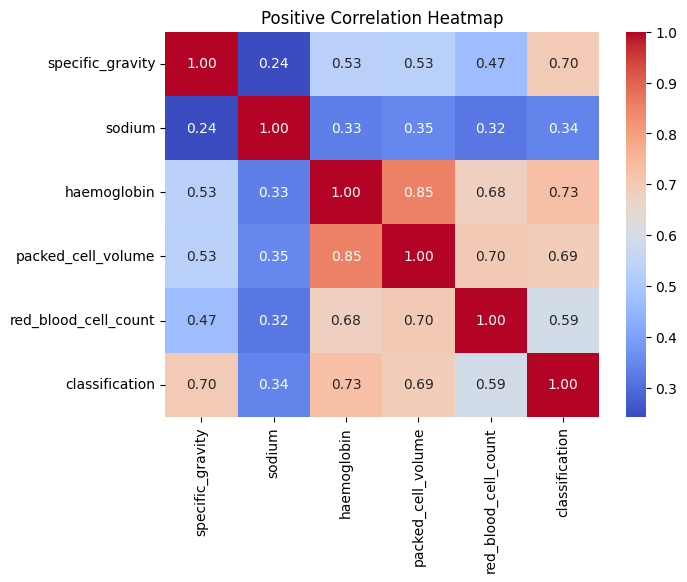

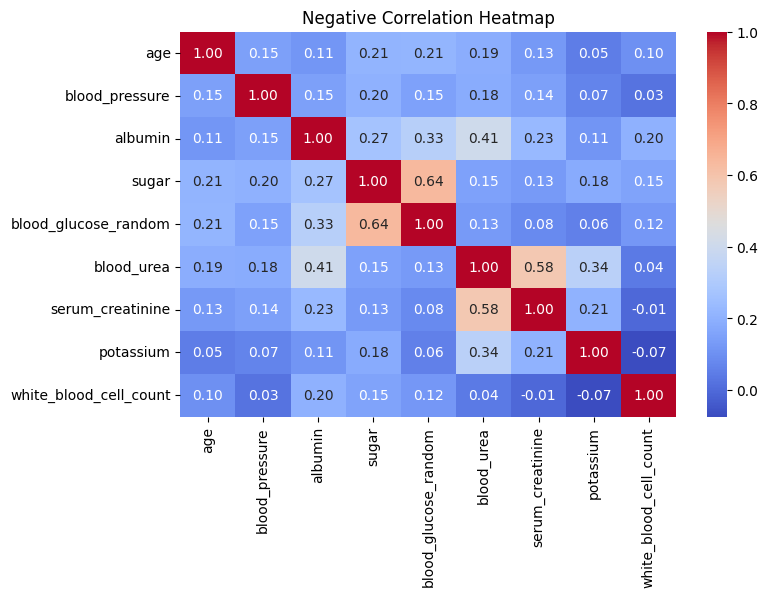

In [457]:
positive_corr_features=correlation_matrix.columns[correlation_matrix.loc['classification']>0]
negative_corr_features=correlation_matrix.columns[correlation_matrix.loc['classification']<0]
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix.loc[positive_corr_features, positive_corr_features],annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Positive Correlation Heatmap')
plt.show()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix.loc[negative_corr_features, negative_corr_features],annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Negative Correlation Heatmap')
plt.show()

In [458]:
target_class=ckd['classification']
features=ckd.drop('classification',axis=1)

# Over Sampling

In [459]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
print(Counter(target_class))

Counter({0: 250, 1: 150})


In [460]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(features,target_class)
print(Counter(y_ros))
X_ros

Counter({0: 250, 1: 250})


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.400000,44.000000,7800.000000,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.300000,38.000000,6000.000000,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.600000,31.000000,7500.000000,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.200000,32.000000,6700.000000,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.600000,35.000000,7300.000000,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,63.0,70.0,1.020,0.0,0.0,1,1,0,0,113.000000,...,16.500000,52.000000,8000.000000,5.100000,0,0,0,0,0,0
496,47.0,80.0,1.020,0.0,0.0,1,1,0,0,95.000000,...,12.526437,38.884498,8406.122449,4.707435,0,0,0,0,0,0
497,43.0,80.0,1.020,0.0,0.0,1,1,0,0,114.000000,...,12.526437,42.000000,8406.122449,4.707435,0,0,0,0,0,0
498,75.0,60.0,1.020,0.0,0.0,1,1,0,0,110.000000,...,14.300000,40.000000,8300.000000,5.800000,0,0,0,0,0,0


In [461]:
y_ros

0      0
1      0
2      0
3      0
4      0
      ..
495    1
496    1
497    1
498    1
499    1
Name: classification, Length: 500, dtype: int32

# Standard Scaling

In [462]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(X_ros)
y=y_ros

# Principle Component Analysis

In [463]:
from sklearn.decomposition import PCA
pca=PCA(.75)
X_pca=pca.fit_transform(x)
print(x.shape)
print(X_pca.shape)
X_pca

(500, 24)
(500, 10)


array([[-0.46420616, -0.67738037,  0.90816232, ..., -0.36503477,
         0.06713115, -0.22915588],
       [-0.80782635,  0.87306583, -1.27982885, ...,  1.64067902,
        -1.98043554,  1.37321242],
       [ 3.58870353, -2.62493941,  1.56161904, ...,  1.4680441 ,
        -1.44692804,  0.06714366],
       ...,
       [-1.31897639,  0.42121233,  0.06591204, ...,  0.36870218,
         0.24095145,  0.35530131],
       [-1.66617076,  0.00790651,  0.43133878, ..., -0.08617472,
         0.06515219, -0.9598404 ],
       [-2.7226913 , -0.11632687,  0.22496911, ..., -0.34630227,
         0.02320284, -0.6344656 ]])

# K-Fold Cross Validation

In [464]:
from sklearn.model_selection import cross_val_score,KFold

In [465]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)

# Sklearn....

In [466]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report

In [467]:
from sklearn.ensemble import RandomForestClassifier

In [468]:
from sklearn.svm import SVC

In [469]:
from sklearn.metrics import confusion_matrix

In [470]:
from sklearn.metrics import roc_curve, auc

#  Models with PCA

# Random Forest

In [471]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [472]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=RandomForestClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of Random Forest with PCA:",min(accuracy_scores))

Accuracy of Random Forest with PCA: 0.98


In [473]:
index=accuracy_scores.index(min(accuracy_scores))

In [474]:
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[24,  0],
       [ 1, 25]], dtype=int64)

In [475]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



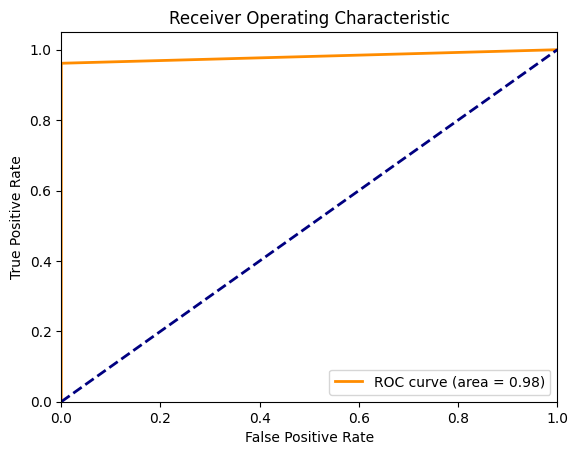

In [476]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Classifier

In [477]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [478]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=SVC()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of SVC with PCA:",min(accuracy_scores))

Accuracy of SVC with PCA: 0.98


In [479]:
index=accuracy_scores.index(min(accuracy_scores))

In [480]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [481]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



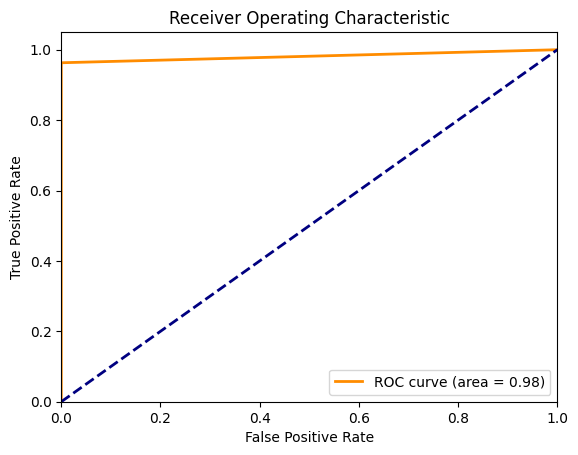

In [482]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [483]:
from sklearn.ensemble import GradientBoostingClassifier

In [484]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [485]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GradientBoostingClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of Gradient boosting with PCA:",min(accuracy_scores))

Accuracy of Gradient boosting with PCA: 0.98


In [486]:
index=accuracy_scores.index(min(accuracy_scores))

In [487]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[24,  0],
       [ 1, 25]], dtype=int64)

In [488]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



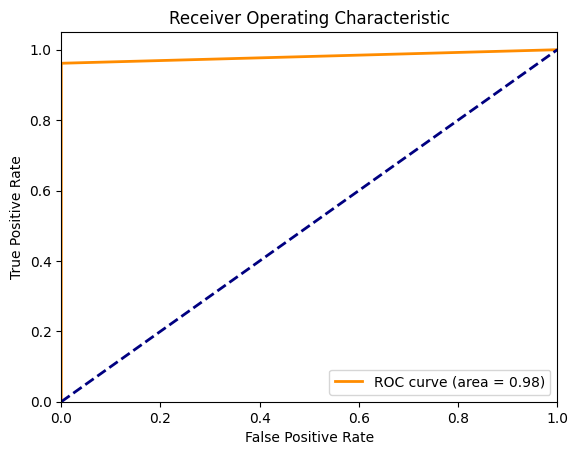

In [489]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ada Boost

In [490]:
from sklearn.ensemble import AdaBoostClassifier

In [491]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [492]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=AdaBoostClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of ada boost with PCA:",min(accuracy_scores))

Accuracy of ada boost with PCA: 0.98


In [493]:
index=accuracy_scores.index(min(accuracy_scores))

In [494]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[24,  0],
       [ 1, 25]], dtype=int64)

In [495]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



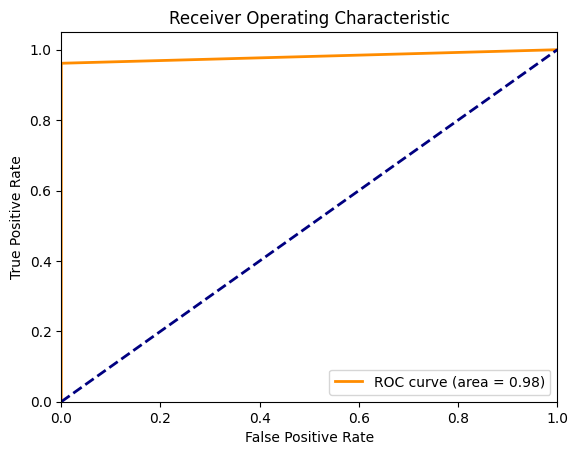

In [496]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Light GBM

In [497]:
from lightgbm import LGBMClassifier

In [498]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [499]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=LGBMClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of light gbm with PCA:",min(accuracy_scores))

[LightGBM] [Info] Number of positive: 224, number of negative: 226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1487
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497778 -> initscore=-0.008889
[LightGBM] [Info] Start training from score -0.008889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [500]:
index=accuracy_scores.index(min(accuracy_scores))

In [501]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [502]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



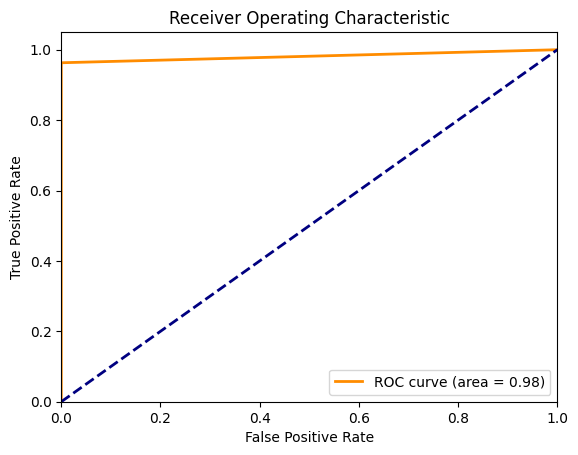

In [503]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XG Boost

In [504]:
from xgboost import XGBClassifier

In [505]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [506]:
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=XGBClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of xg boost with PCA:",min(accuracy_scores))

Accuracy of xg boost with PCA: 0.96


In [507]:
index=accuracy_scores.index(min(accuracy_scores))

In [508]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[22,  0],
       [ 2, 26]], dtype=int64)

In [509]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.93      0.96        28

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



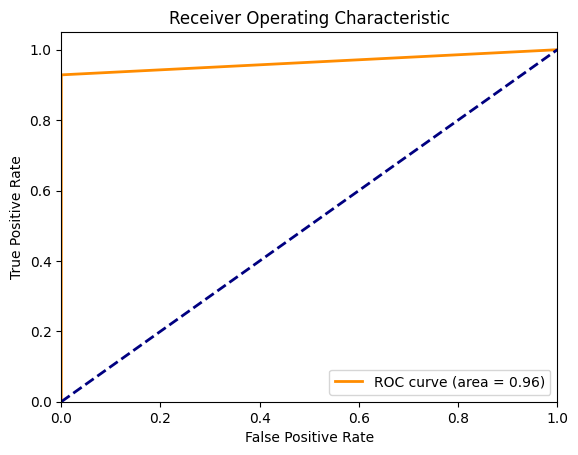

In [510]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [511]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of decision tree without PCA:",min(accuracy_scores))

Accuracy of decision tree without PCA: 0.98


In [512]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



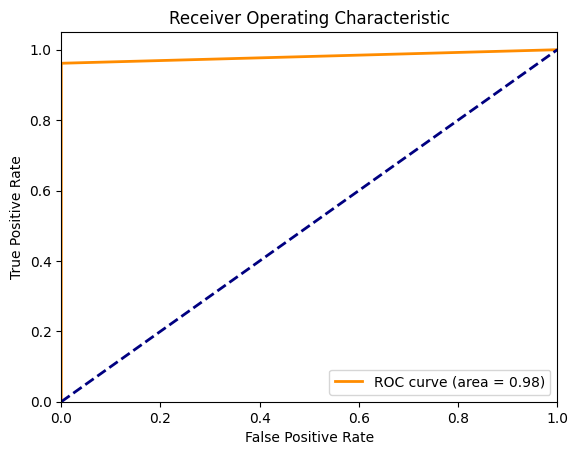

In [513]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# cat boost

In [514]:
from catboost import CatBoostClassifier

In [515]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=CatBoostClassifier(silent=True)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of cat boost without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)


Accuracy of cat boost without PCA: 0.98
[[24  0]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



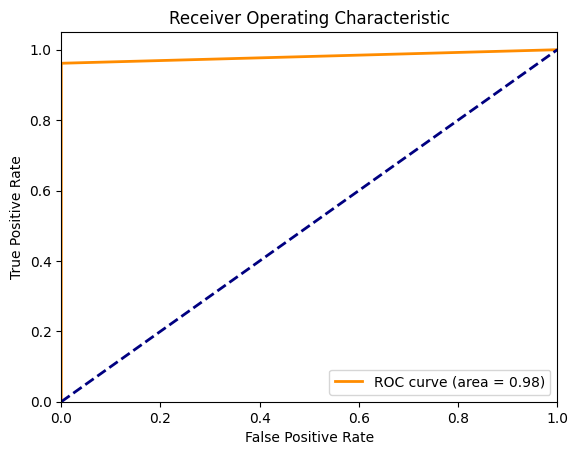

In [516]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Knn

In [517]:
from sklearn.neighbors import KNeighborsClassifier

In [518]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=KNeighborsClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of knn without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

Accuracy of knn without PCA: 0.96
[[27  0]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.91      0.95        23

    accuracy                           0.96        50
   macro avg       0.97      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



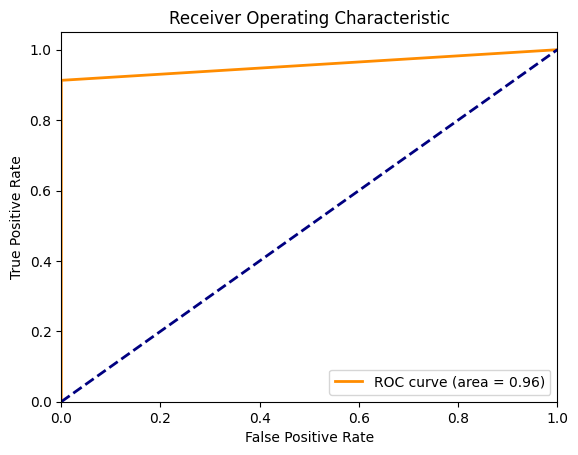

In [519]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# naive bayes

In [520]:
from sklearn.naive_bayes import GaussianNB

In [521]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of naive bayes without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

Accuracy of naive bayes without PCA: 0.96
[[20  0]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.93      0.97        30

    accuracy                           0.96        50
   macro avg       0.95      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



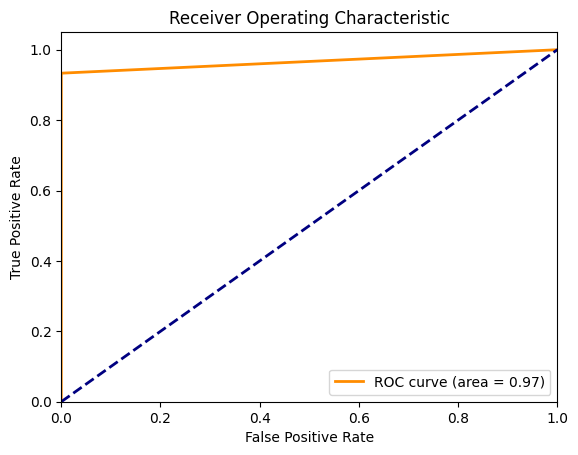

In [522]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# stochastic boosting

In [523]:
from sklearn.linear_model import SGDClassifier

In [524]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GradientBoostingClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy ofstochastic boosting without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

Accuracy ofstochastic boosting without PCA: 0.98
[[24  0]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



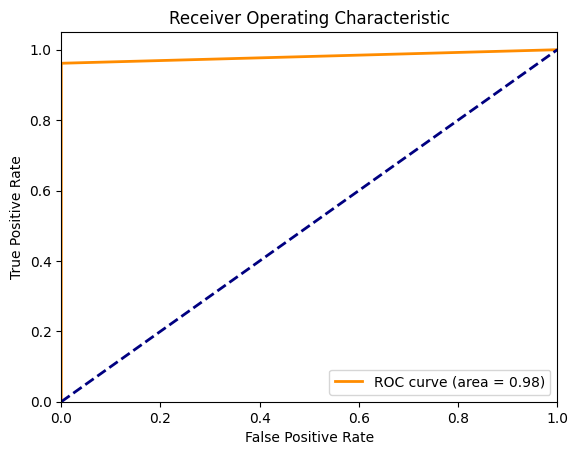

In [525]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# extra trees

In [526]:
from sklearn.ensemble import ExtraTreesClassifier

In [527]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=ExtraTreesClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of Extra trees without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

Accuracy of Extra trees without PCA: 0.98
[[19  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.97      0.98        31

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



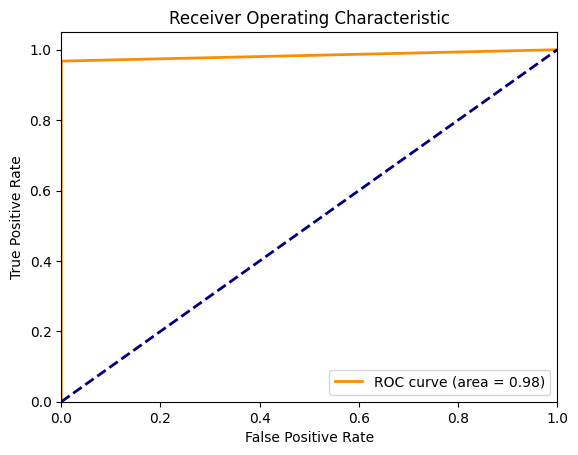

In [528]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ANN

In [529]:
from sklearn.neural_network import MLPClassifier

In [530]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(X_pca):
    X_train, X_test=X_pca[train_index],X_pca[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=MLPClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy:", min(accuracy_scores))
index = accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index], y_tst[index])
print("Confusion Matrix:")
print(confusion_mat)
report = classification_report(y_pr[index], y_tst[index])
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[21  0]
 [ 1 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



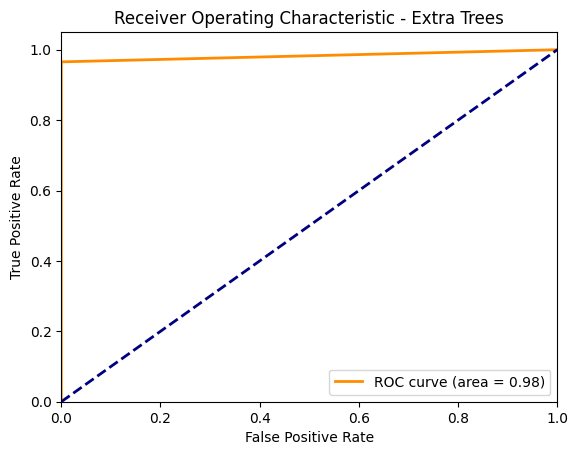

In [531]:
fpr, tpr, _ = roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ' + clf_name)
plt.legend(loc="lower right")
plt.show()

# Models Without PCA

# Random Forest

In [532]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [533]:
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=RandomForestClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of Random Forest without PCA:",min(accuracy_scores))

Accuracy of Random Forest without PCA: 0.98


In [534]:
index=accuracy_scores.index(min(accuracy_scores))

In [535]:
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])

In [536]:
confusion_mat

array([[26,  0],
       [ 1, 23]], dtype=int64)

In [537]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.96      0.98        24

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



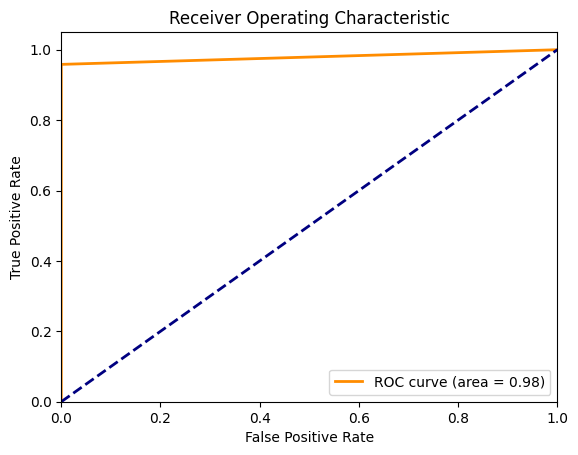

In [538]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Classifier

In [539]:
accuracy_scores=[]
y_pr=[]
y_tst=[]

In [540]:
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=SVC()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of SVC without PCA:",min(accuracy_scores))

Accuracy of SVC without PCA: 0.98


In [541]:
index=accuracy_scores.index(min(accuracy_scores))

In [542]:
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [543]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



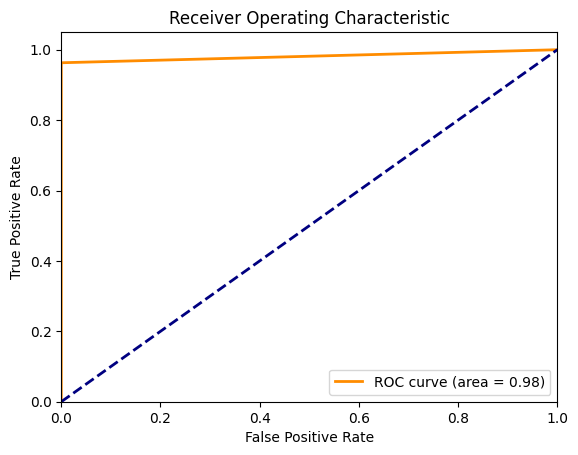

In [544]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Gradient Boosting

In [545]:
from sklearn.ensemble import GradientBoostingClassifier

In [546]:
accuracy_scores=[]
y_pr=[]
y_tst=[]


for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GradientBoostingClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of gradient boosting without PCA:",min(accuracy_scores))



Accuracy of gradient boosting without PCA: 0.98


In [547]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [548]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



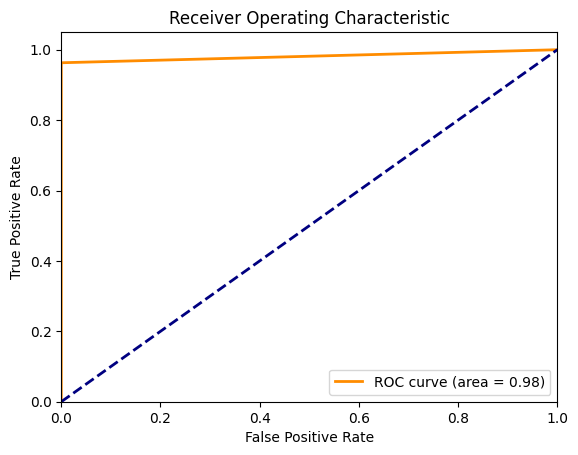

In [549]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Ada Boost

In [550]:
from sklearn.ensemble import AdaBoostClassifier

In [551]:
accuracy_scores=[]
y_pr=[]
y_tst=[]


for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=AdaBoostClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy ada boost without PCA:",min(accuracy_scores))



Accuracy ada boost without PCA: 0.96


In [552]:
index=accuracy_scores.index(min(accuracy_scores))

confusion_mat = confusion_matrix(y_pr[index],y_tst[index])

confusion_mat


array([[25,  0],
       [ 2, 23]], dtype=int64)

In [553]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



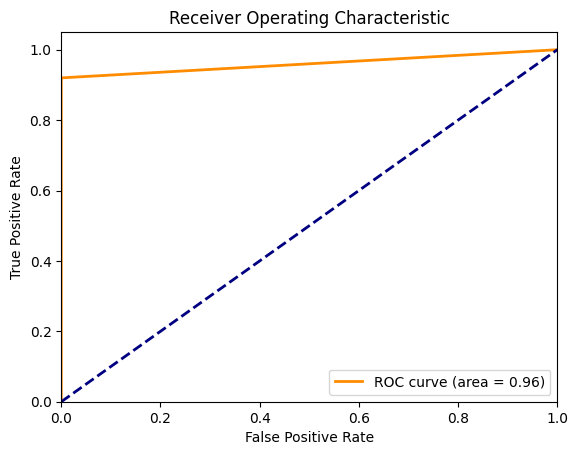

In [554]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Light GBM

In [555]:
from lightgbm import LGBMClassifier

In [556]:
accuracy_scores=[]
y_pr=[]
y_tst=[]


for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=LGBMClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of light gbm without PCA:",min(accuracy_scores))


[LightGBM] [Info] Number of positive: 224, number of negative: 226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497778 -> initscore=-0.008889
[LightGBM] [Info] Start training from score -0.008889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [557]:
index=accuracy_scores.index(min(accuracy_scores))

confusion_mat = confusion_matrix(y_pr[index],y_tst[index])

confusion_mat


array([[25,  0],
       [ 2, 23]], dtype=int64)

In [558]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



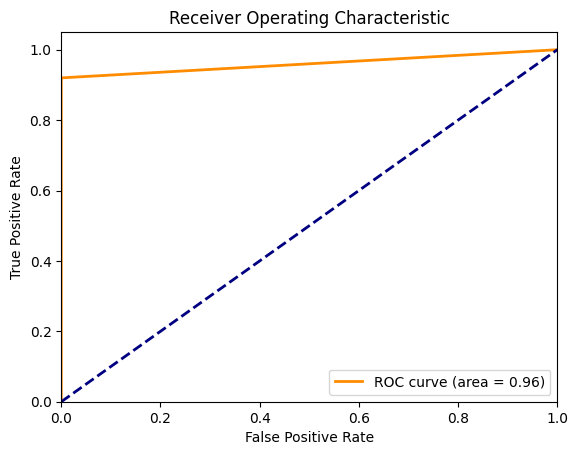

In [559]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XG Boost

In [560]:
from xgboost import XGBClassifier

In [561]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=XGBClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of xg boost without PCA:",min(accuracy_scores))

Accuracy of xg boost without PCA: 0.98


In [562]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[23,  0],
       [ 1, 26]], dtype=int64)

In [563]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



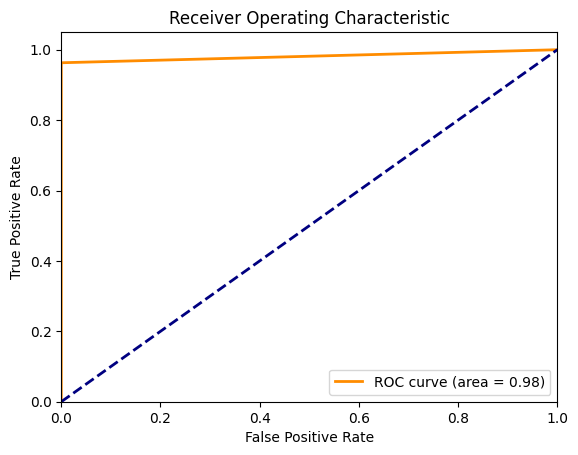

In [564]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# DecisionTree

In [565]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=DecisionTreeClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of decision tree without PCA:",min(accuracy_scores))

Accuracy of decision tree without PCA: 0.96


In [566]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
confusion_mat

array([[25,  0],
       [ 2, 23]], dtype=int64)

In [567]:
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



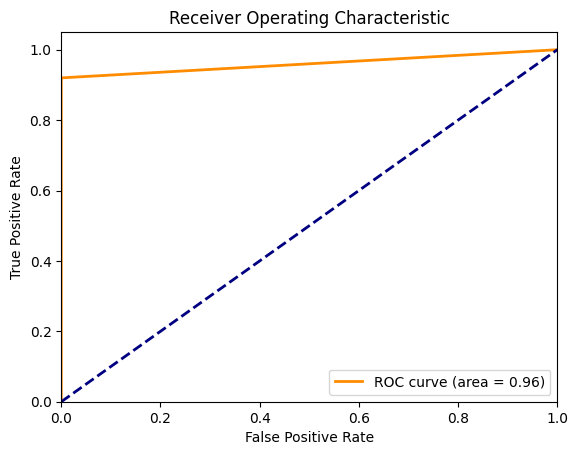

In [568]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# cat boost

In [569]:
from catboost import CatBoostClassifier

In [570]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=CatBoostClassifier(silent=True)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy ofcat boost without PCA:",min(accuracy_scores))

Accuracy ofcat boost without PCA: 0.96


In [571]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

[[25  0]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.92      0.96        25

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



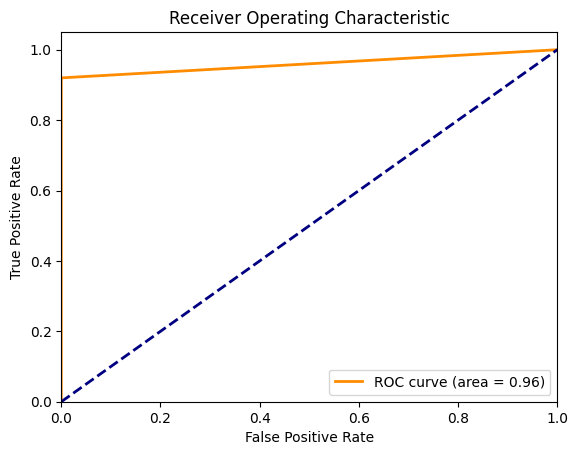

In [572]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# knn

In [573]:
from sklearn.neighbors import KNeighborsClassifier

In [574]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=KNeighborsClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of knn without PCA:",min(accuracy_scores))

Accuracy of knn without PCA: 0.94


In [575]:
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

[[21  0]
 [ 3 26]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.90      0.95        29

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



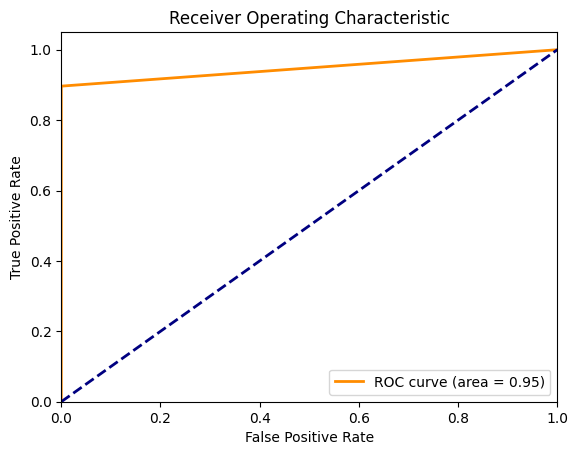

In [576]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# naive bayes

In [577]:
from sklearn.naive_bayes import GaussianNB

In [578]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GaussianNB()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of naive bayes without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)


Accuracy of naive bayes without PCA: 0.92
[[22  0]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.86      0.92        28

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



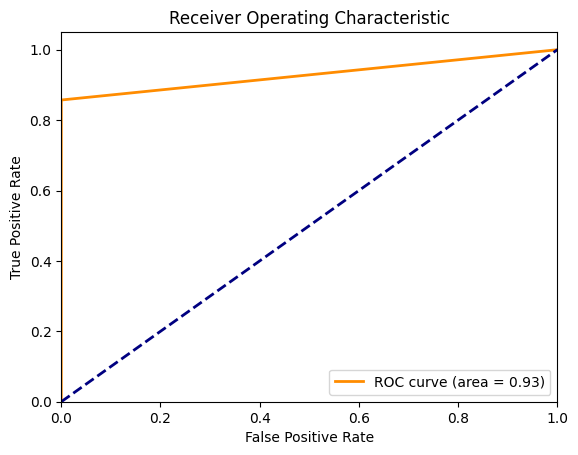

In [579]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# stochastic gradient boosting

In [580]:
from sklearn.linear_model import SGDClassifier

In [581]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=GradientBoostingClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of stochastic gradnt boosting without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)


Accuracy of stochastic gradnt boosting without PCA: 0.98
[[23  0]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



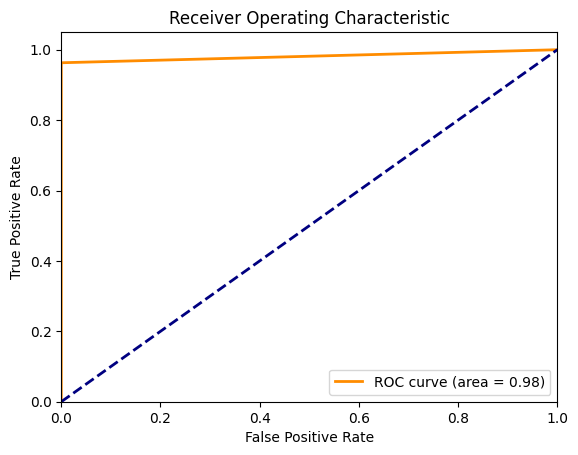

In [582]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Extra Trees

In [583]:
from sklearn.ensemble import ExtraTreesClassifier

In [584]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=ExtraTreesClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy of Extra Trees without PCA:",min(accuracy_scores))
index=accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index],y_tst[index])
print(confusion_mat)
y_pr[index]
report=classification_report(y_pr[index],y_tst[index])
print(report)

Accuracy of Extra Trees without PCA: 0.98
[[19  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.97      0.98        31

    accuracy                           0.98        50
   macro avg       0.97      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



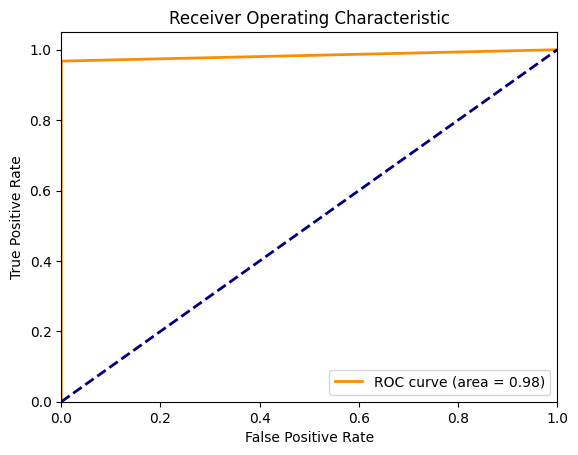

In [585]:
fpr,tpr,_= roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2,label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1],[0, 1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# ANN

In [586]:
from sklearn.neural_network import MLPClassifier

In [587]:
accuracy_scores=[]
y_pr=[]
y_tst=[]
for train_index,test_index in kf.split(x):
    X_train, X_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model=MLPClassifier()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pr.append(y_pred)
    y_tst.append(y_test)
    accuracy=accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print("Accuracy:", min(accuracy_scores))
index = accuracy_scores.index(min(accuracy_scores))
confusion_mat = confusion_matrix(y_pr[index], y_tst[index])
print("Confusion Matrix:")
print(confusion_mat)
report = classification_report(y_pr[index], y_tst[index])
print("Classification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[21  0]
 [ 1 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



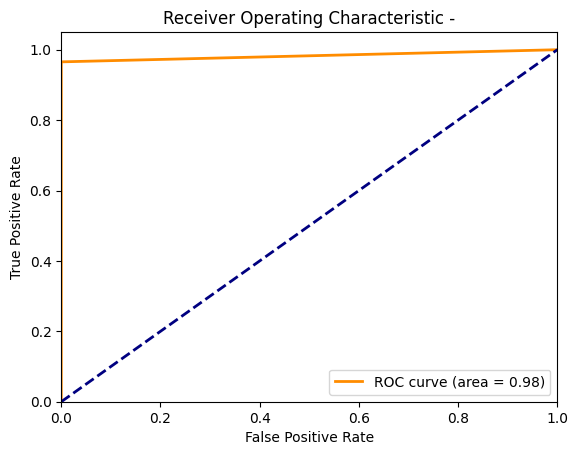

In [588]:
fpr, tpr, _ = roc_curve(y_pr[index], y_tst[index])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -')
plt.legend(loc="lower right")
plt.show()

# Comparision

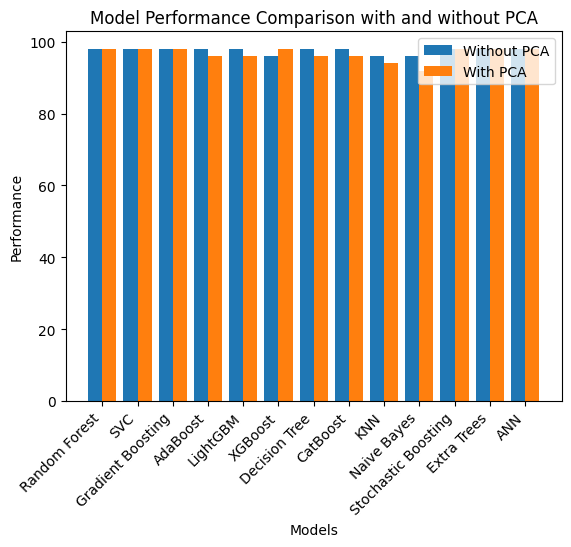

In [590]:
models = ['Random Forest', 'SVC', 'Gradient Boosting', 'AdaBoost', 'LightGBM', 
          'XGBoost', 'Decision Tree', 'CatBoost', 'KNN', 'Naive Bayes', 
          'Stochastic Boosting', 'Extra Trees', 'ANN']
performance_without_pca = [98, 98, 98, 98, 98, 96, 98, 98, 96, 96, 98, 98, 98]
performance_with_pca = [98, 98, 98, 96, 96, 98, 96, 96, 94, 92, 98, 98, 98]
x = range(len(models))
width = 0.4
fig, ax = plt.subplots()
bar1 = ax.bar(x, performance_without_pca, width, label='Without PCA')
bar2 = ax.bar([i + width for i in x], performance_with_pca, width, label='With PCA')
ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.set_title('Model Performance Comparison with and without PCA')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()
plt.show()